# Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tweets = pd.read_csv('tweet_data_1.csv')
tweets.head(3)

,tweet_id,text
0,205888692580126720,radensaleh not myth learn life bring kids gale...
1,207430942028079104,new bmw 3 series awarded 5 stars euro ncap cra...
2,208204757779759105,bmw hand 200 electric vehicles olympics


In [4]:
tweets.loc[0]['text'] # just for testing

'radensaleh not myth learn life bring kids galeri nasional'

### 1. Analyzing Text Statistics

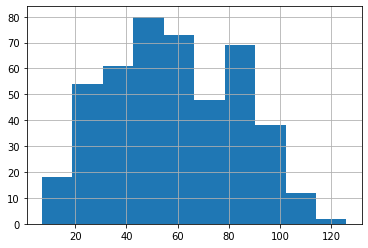

In [5]:
# sentence frequency analysis
tweets["text"].str.len().hist() 

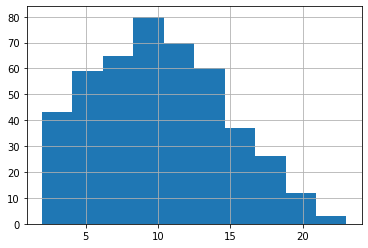

In [6]:
# word frequency analysis
tweets["text"].str.split().\
    map(lambda x: len(x)).\
    hist()

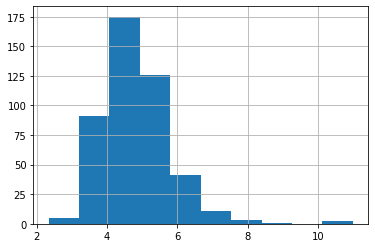

In [7]:
# average word length analysis
tweets["text"].str.split().\
    apply(lambda x: [len(i) for i in x]).\
    map(lambda x: np.mean(x)).hist()

In [8]:
stop = ['bmw']  # can add custom stopwords based on different entities

In [9]:
corpus = []
tweet = tweets["text"].str.split()
tweet = tweet.values.tolist()
corpus = [word for i in tweet for word in i if len(word)>2 and word not in stop]

In [10]:
corpus

['radensaleh',
 'not',
 'myth',
 'learn',
 'life',
 'bring',
 'kids',
 'galeri',
 'nasional',
 'new',
 'series',
 'awarded',
 'stars',
 'euro',
 'ncap',
 'crash',
 'test',
 'read',
 'news',
 'page',
 'hand',
 '200',
 'electric',
 'vehicles',
 'olympics',
 'asked',
 'sauber',
 'info',
 'images',
 'split',
 'car',
 'said',
 'shows',
 'not',
 'done',
 'discussed',
 'racky',
 'think',
 'driving',
 'something',
 'another',
 'life',
 'found',
 'motorcycles',
 'awfully',
 'appealing',
 'not',
 'much',
 'tho',
 'still',
 'partial',
 'cruiser',
 'sale',
 'replacement',
 'driver',
 'side',
 'headlight',
 'assembly',
 'latest',
 'bms',
 'sale',
 'e46',
 'coupe',
 'seats',
 'longbridge',
 'longbridge',
 'b31',
 'united',
 'kingdombmw',
 'e46',
 'coup',
 'forsale',
 'tyc',
 '6472',
 'driver',
 'side',
 'headlight',
 'assembly',
 'reviews',
 'reveals',
 'new',
 'performance',
 'market',
 'lifestyle',
 'burning',
 'abandoned',
 'crusher',
 'road',
 'bedford',
 'katonah',
 'patch',
 'concept',
 'comin

In [11]:
from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

C:\Users\Rohan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


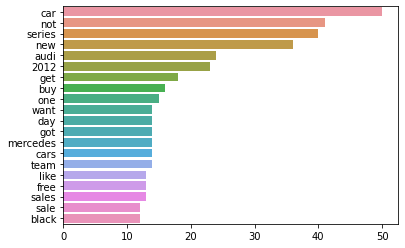

In [12]:
from collections import Counter
import seaborn as sns
counter = Counter(corpus)
most = counter.most_common()

# Top 20 most frequently occurring words
x, y = [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [13]:
most

[('car', 50),
 ('not', 41),
 ('series', 40),
 ('new', 36),
 ('audi', 24),
 ('2012', 23),
 ('get', 18),
 ('buy', 16),
 ('one', 15),
 ('want', 14),
 ('day', 14),
 ('got', 14),
 ('mercedes', 14),
 ('cars', 14),
 ('team', 14),
 ('like', 13),
 ('free', 13),
 ('sales', 13),
 ('sale', 12),
 ('black', 12),
 ('video', 12),
 ('white', 11),
 ('back', 11),
 ('via', 11),
 ('good', 11),
 ('sport', 11),
 ('coupe', 10),
 ('drive', 10),
 ('time', 10),
 ('next', 10),
 ('manual', 10),
 ('think', 9),
 ('driving', 9),
 ('today', 9),
 ('service', 9),
 ('money', 9),
 ('lol', 9),
 ('year', 9),
 ('toyota', 9),
 ('siri', 9),
 ('still', 8),
 ('driver', 8),
 ('may', 8),
 ('first', 8),
 ('old', 8),
 ('big', 8),
 ('see', 8),
 ('love', 8),
 ('honda', 8),
 ('said', 7),
 ('side', 7),
 ('know', 7),
 ('paris', 7),
 ('added', 7),
 ('great', 7),
 ('benz', 7),
 ('jaguar', 7),
 ('haha', 7),
 ('motorcycle', 7),
 ('three', 7),
 ('take', 7),
 ('man', 7),
 ('sedan', 7),
 ('speed', 7),
 ('motorrad', 7),
 ('life', 6),
 ('bring', 

### 2. N-gram Exploration

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

'''Implementing function to get barplot'''
def plot_top_ngrams_barchart(text, n=2):
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    
    '''to calculate for different n-grams'''
    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n,n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq
    
    top_n_bigrams = _get_top_ngram(text,n)[:10]
    x,y = map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

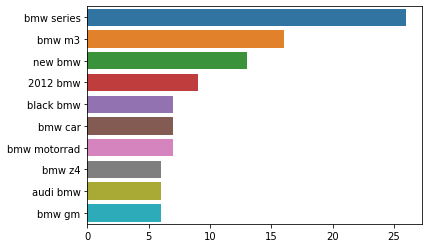

In [15]:
# bigram plot
plot_top_ngrams_barchart(tweets["text"], 2)    

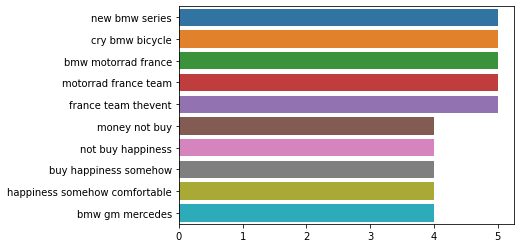

In [16]:
# trigram plot
plot_top_ngrams_barchart(tweets["text"], 3)   

### 3. WordCloud

In [17]:
# importing file containing hashtags
twths = pd.read_csv('with_hashtags.csv')

# list of hashtags
hashtag = [word for stmnt in list(twths['text']) for word in stmnt.split(' ') if word.startswith('#')]

In [18]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data):
    wordcloud = WordCloud(background_color='white', max_words=100, max_font_size=30, scale=3, random_state=1)
    wordcloud = wordcloud.generate(str(data))
    
    fig = plt.figure(1, figsize=(12,12))
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()

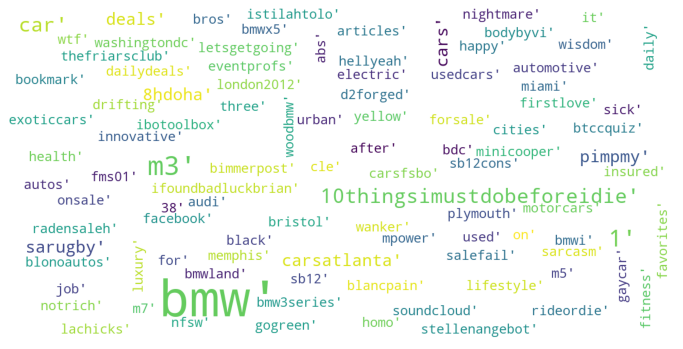

In [19]:
# wordcloud for hashtags   
show_wordcloud(hashtag)

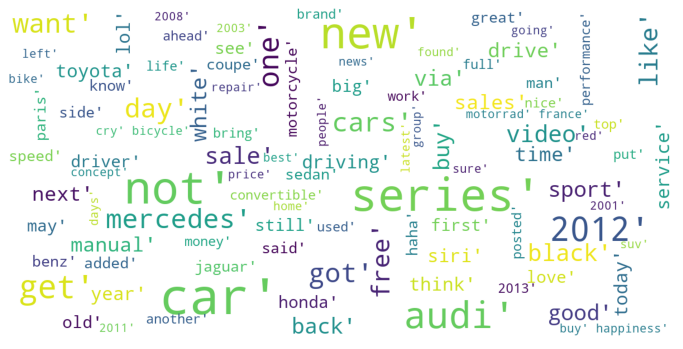

In [20]:
# wordcloud for tweets' text
show_wordcloud(corpus)

### 4. Named Entity Recognition

In [21]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

def ner(text):
    doc = nlp(text)
    return [X.label_ for X in doc.ents]

def ner_ent(text, ent):  
    doc = nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]


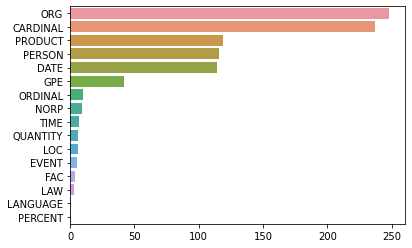

In [22]:
ent = tweets['text'].apply(lambda x: ner(x))
ent = [x for sub in ent for x in sub]

counter = Counter(ent)
count = counter.most_common()

x, y = map(list, zip(*count))
sns.barplot(x=y, y=x)

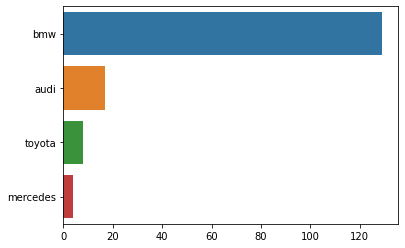

In [23]:
org = tweets['text'].apply(lambda x: ner_ent(x, 'ORG'))  # ORG here means brands or organizations
org = [i for x in org for i in x]
counter = Counter(org)

x, y =map(list, zip(*counter.most_common(4)))
sns.barplot(y,x)

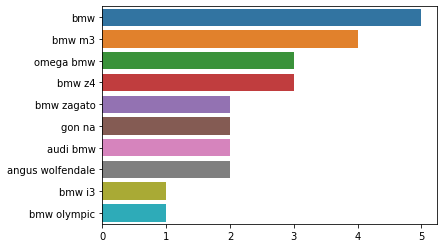

In [24]:
gpe = tweets['text'].apply(lambda x: ner_ent(x, 'PERSON')) # here PERSON refers to particular model of vehicles
gpe = [i for x in gpe for i in x]
counter = Counter(gpe)

x, y =map(list, zip(*counter.most_common(10)))
sns.barplot(y,x)

# Topic Modelling

In [25]:
# Pre-processing tweets for topic modelling
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_tweets(df):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for tweets in df["text"]:
        words = [w for w in word_tokenize(tweets)]
        words = [lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus = preprocess_tweets(tweets)
corpus = [[ele for ele in sub if ele not in ['bmw', 'car']] for sub in corpus]  # to remove "bmw" and "car" from the model as it is clouding the model

In [27]:
import gensim

dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [9]:
# fine tuned model (works best when no. of topics are 6)
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 6, id2word = dic, passes = 10, workers = 3)
lda_model.show_topics()

[(0,
  '0.013*"not" + 0.011*"buy" + 0.007*"2012" + 0.006*"video" + 0.006*"know" + 0.006*"money" + 0.006*"bicycle" + 0.006*"cry" + 0.006*"happiness" + 0.005*"facebook"'),
 (1,
  '0.011*"not" + 0.009*"siri" + 0.006*"wheel" + 0.006*"honda" + 0.005*"old" + 0.005*"sale" + 0.005*"button" + 0.005*"toyota" + 0.005*"mercedes" + 0.004*"want"'),
 (2,
  '0.013*"get" + 0.013*"sale" + 0.006*"three" + 0.006*"new" + 0.005*"want" + 0.005*"like" + 0.005*"see" + 0.005*"back" + 0.005*"make" + 0.005*"audi"'),
 (3,
  '0.025*"series" + 0.021*"new" + 0.007*"2012" + 0.007*"team" + 0.006*"mercedes" + 0.006*"audi" + 0.006*"sale" + 0.006*"added" + 0.005*"video" + 0.004*"not"'),
 (4,
  '0.012*"not" + 0.011*"manual" + 0.009*"new" + 0.007*"free" + 0.007*"today" + 0.005*"team" + 0.005*"bring" + 0.005*"time" + 0.004*"service" + 0.004*"audi"'),
 (5,
  '0.006*"got" + 0.006*"audi" + 0.006*"not" + 0.005*"coupe" + 0.005*"drive" + 0.005*"think" + 0.005*"year" + 0.005*"day" + 0.004*"lol" + 0.004*"black"')]

In [18]:
'''saving the model''' 
# -------  lda_model.save('lda.model') ----------

'''later on, load trained model from file'''
# -------  lda_model =  gensim.models.LdaModel.load('lda.model') --------

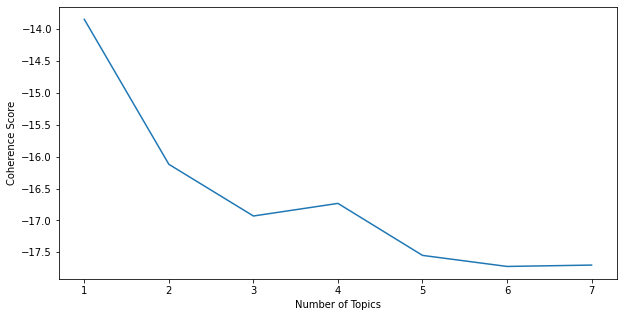

In [43]:
from gensim.models import CoherenceModel

# compute coherence scores
tweets_coherence = []
for nb_topics in range(1,8):
    lda = gensim.models.LdaMulticore(bow_corpus, num_topics = nb_topics, id2word = dic, passes = 10, workers = 3)
    cohm = CoherenceModel(model=lda, corpus=bow_corpus, dictionary=dic, coherence='u_mass')
    coh = cohm.get_coherence()
    tweets_coherence.append(coh)

# visualize coherence score w.r.t. topics
plt.figure(figsize=(10,5))
plt.plot(range(1, 8),tweets_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

In [16]:
# Visualizing topic distribution interactively
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.092371  0.048289       1        1  20.267864
1      0.034524  0.079504       2        1  17.620008
4     -0.048458 -0.105160       3        1  17.269049
0     -0.131139  0.070053       4        1  15.508020
2      0.070356 -0.053981       5        1  15.312353
5     -0.017655 -0.038706       6        1  14.022708, topic_info=        Term       Freq      Total Category  logprob  loglift
13       new  24.000000  24.000000  Default  30.0000  30.0000
17    series  27.000000  27.000000  Default  29.0000  29.0000
529   manual   7.000000   7.000000  Default  28.0000  28.0000
273      get  14.000000  14.000000  Default  27.0000  27.0000
1878    siri   6.000000   6.000000  Default  26.0000  26.0000
...      ...        ...        ...      ...      ...      ...
111   people   1.349720   3.842857   Topic6  -5.9332   0.9182
88     first   1.349714   5.911637   Topic6  -5.9332   0.4875
206     gran   1.349673   3.201956   Topic6  -5.9332   1.1006
46     still   1.349653   5.870163   Topic6  -5.9332   0.4945
303      see   1.349632   5.792449   Topic6  -5.9332   0.5078

[380 rows x 6 columns], token_table=      Topic      Freq                       Term
term                                            
1413      1  0.734788  10thingsimustdobeforeidie
917       5  0.516785                       1992
1748      4  0.516582                       1996
677       1  0.253000                       2001
677       5  0.505999                       2001
...     ...       ...                        ...
377       6  0.349964                       year
746       3  0.505699                  yesterday
1004      1  0.491962                      yoona
549       4  0.516588                     zagato
1460      6  0.526365                       zero

[583 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 1, 3, 6])

In [13]:
# classification of topics for different tweets
t = lda_model.get_document_topics(bow_corpus)

def class_topics(tpl):
    z = 0
    n = 0
    for topic, prob in tpl:
        if prob > z:
            z = prob
            n = topic
    return n

tp = []
for i in range(455):
    x = class_topics(t[i])
    tp.append(x)

tweets['topic'] = tp

In [14]:
tweets # can see topic no. for each tweet

,tweet_id,text,topic
0,205888692580126720,radensaleh not myth learn life bring kids gale...,1
1,207430942028079104,new bmw 3 series awarded 5 stars euro ncap cra...,3
2,208204757779759105,bmw hand 200 electric vehicles olympics,3
3,208283774251831296,asked sauber info images split car said shows ...,1
4,208342777627549696,racky think im driving bmw something,1
...,...,...,...
450,209938458611941376,free black bmw choice curious visit,2
451,208968123179741184,1980 bmw r100rs cafe racer via,0
452,210234207379800064,agree money not buy happiness somehow comforta...,0
453,209609738441334784,bmw r100 7 4h10 paris via,5


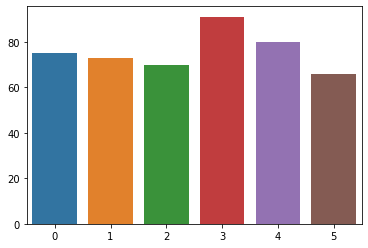

In [15]:
# Distribution of tweets based on topics
counter = Counter(tweets['topic'])
most = counter.most_common()

x = []
y = []
for word,count in most:
    x.append(word)
    y.append(count)

sns.barplot(x,y)

# Sentiment Analysis

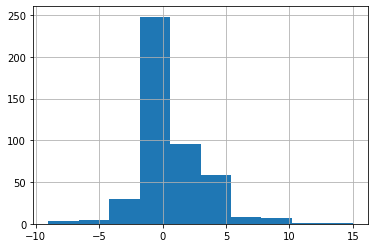

In [35]:
from afinn import Afinn
afinn = Afinn()
def polarity(text):
    return afinn.score(text)

tweets['polarity_score'] = tweets['text'].\
    apply(lambda x: polarity(x))
tweets['polarity_score'].hist()

In [36]:
tweets # Datafrmae using polarity scores of Afinn

,tweet_id,text,polarity_score
0,205888692580126720,radensaleh not myth learn life bring kids gale...,-1.0
1,207430942028079104,new bmw 3 series awarded 5 stars euro ncap cra...,1.0
2,208204757779759105,bmw hand 200 electric vehicles olympics,0.0
3,208283774251831296,asked sauber info images split car said shows ...,0.0
4,208342777627549696,racky think im driving bmw something,0.0
...,...,...,...
450,209938458611941376,free black bmw choice curious visit,2.0
451,208968123179741184,1980 bmw r100rs cafe racer via,0.0
452,210234207379800064,agree money not buy happiness somehow comforta...,5.0
453,209609738441334784,bmw r100 7 4h10 paris via,0.0


In [37]:
# Afinn sentiment scores
pos = 0 
neg = 0
neu = 0
for twt in tweets['polarity_score']:
    if twt > 0:
        pos = pos + 1
    if twt == 0:
        neu = neu + 1
    if twt < 0:
        neg = neg + 1
print("positive : {}".format(pos))
print("neutral  : {}".format(neu))
print("negative : {}".format(neg))

positive : 170
neutral  : 222
negative : 63


<BarContainer object of 3 artists>

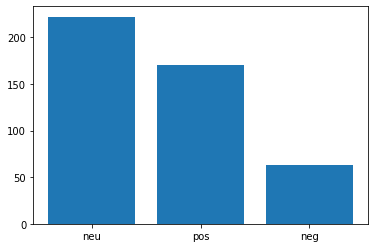

In [38]:
# Barplot of Afinn polarity scores
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
tweets['polarity'] = tweets['polarity_score'].\
    map(lambda x: sentiment(x))

plt.bar(tweets.polarity.value_counts().index, tweets.polarity.value_counts())

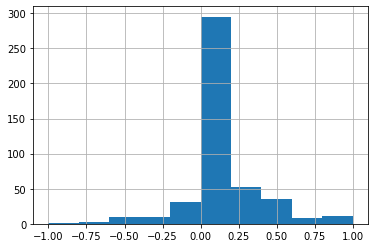

In [32]:
from textblob import TextBlob
afinn = Afinn()
def polarity(text):
    return TextBlob(text).sentiment.polarity

tweets['polarity_score'] = tweets['text'].\
    apply(lambda x: polarity(x))
tweets['polarity_score'].hist()

In [33]:
# TextBlob sentiment scores
pos = 0 
neg = 0
neu = 0
for twt in tweets['polarity_score']:
    if twt > 0:
        pos = pos + 1
    if twt == 0:
        neu = neu + 1
    if twt < 0:
        neg = neg + 1
print("positive : {}".format(pos))
print("neutral  : {}".format(neu))
print("negative : {}".format(neg))

positive : 191
neutral  : 212
negative : 52


In [34]:
tweets # Datafrmae using polarity scores of Textblob

,tweet_id,text,polarity_score
0,205888692580126720,radensaleh not myth learn life bring kids gale...,0.000000
1,207430942028079104,new bmw 3 series awarded 5 stars euro ncap cra...,0.136364
2,208204757779759105,bmw hand 200 electric vehicles olympics,0.000000
3,208283774251831296,asked sauber info images split car said shows ...,0.000000
4,208342777627549696,racky think im driving bmw something,0.000000
...,...,...,...
450,209938458611941376,free black bmw choice curious visit,0.044444
451,208968123179741184,1980 bmw r100rs cafe racer via,0.000000
452,210234207379800064,agree money not buy happiness somehow comforta...,0.550000
453,209609738441334784,bmw r100 7 4h10 paris via,0.000000


<BarContainer object of 3 artists>

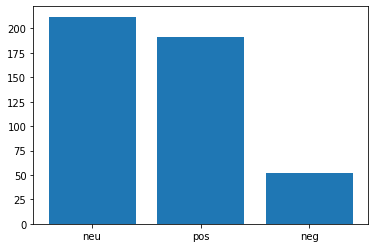

In [5]:
# Barplot of TextBlob polarity scores
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
tweets['polarity'] = tweets['polarity_score'].\
    map(lambda x: sentiment(x))

plt.bar(tweets.polarity.value_counts().index, tweets.polarity.value_counts())

In [29]:
tweets[tweets['polarity']=='pos']['text'].head()

1     new bmw 3 series awarded 5 stars euro ncap cra...
5     another life found motorcycles awfully appeali...
7     latest bms sale bmw e46 coupe seats longbridge...
9     bmw reveals new performance m3 amp m5 uk marke...
13    bmw developing handwriting recognition gesture...
Name: text, dtype: object

In [30]:
tweets[tweets['polarity']=='neg']['text'].head()

12                          bmw m3 limited edition uk 1
14    bmw m3 gtr alex gomes nfscars bmw m3 gtr alex ...
27    guy white bmw drove past wearing sunglasses ba...
29    url still reflecting old one save settings eav...
53    day get csl back bmw release performance editi...
Name: text, dtype: object

<BarContainer object of 3 artists>

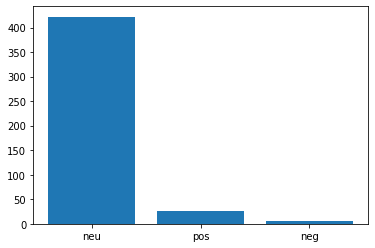

In [39]:
# Vader Sentiment Analysis ( Gave a poor result of sentiments)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    # return as
    return np.argmax(list(ss.values())[:-1])

tweets['polarity'] = tweets['text'].\
    map(lambda x: get_vader_score(x))
polarity = tweets['polarity'].replace({0:'neg', 1:'neu', 2:'pos'})

plt.bar(polarity.value_counts().index, polarity.value_counts())

In [40]:
tweets

,tweet_id,text,polarity_score,polarity
0,205888692580126720,radensaleh not myth learn life bring kids gale...,-1.0,1
1,207430942028079104,new bmw 3 series awarded 5 stars euro ncap cra...,1.0,1
2,208204757779759105,bmw hand 200 electric vehicles olympics,0.0,1
3,208283774251831296,asked sauber info images split car said shows ...,0.0,1
4,208342777627549696,racky think im driving bmw something,0.0,1
...,...,...,...,...
450,209938458611941376,free black bmw choice curious visit,2.0,2
451,208968123179741184,1980 bmw r100rs cafe racer via,0.0,1
452,210234207379800064,agree money not buy happiness somehow comforta...,5.0,1
453,209609738441334784,bmw r100 7 4h10 paris via,0.0,1


In [41]:
# Vader Sentiment Analysis
pos = 0 
neg = 0
neu = 0
for twt in tweets['polarity']:
    if twt == 2:
        pos = pos + 1
    if twt == 1:
        neu = neu + 1
    if twt == 0:
        neg = neg + 1
print("positive : {}".format(pos))
print("neutral  : {}".format(neu))
print("negative : {}".format(neg))

positive : 27
neutral  : 422
negative : 6
